# PDE reconstruction using (physics-informed) feedforward neural networks
## 1 Introduction

This example illustrates how to implement a neural network (NN) and modify the loss function to introduce some physical knowledge during the training of the network.
The present case is illustrated on the Kuramoto-Sivashinsky (KS) equation:
\begin{equation}
\frac{\partial u}{\partial t} + \frac{\partial^2 u}{\partial x^2} + \frac{\partial u}{\partial x^4} + u \frac{\partial u}{\partial x} = 0, \hspace{11pt}
x\in[0,2\pi L]
\end{equation}
with periodic boundary conditions:
The initial condition is:
$$u(x,0) = - \sin(x/(2\pi L))$$
and here $L=6$.
The KS equation models the diffusive instabilities in a laminar flame front.

In this example, we will study how to implement a NN that can estimate the solution of the PDE presented above. To this aim, we will present a general implementation of a feedforward NN and train it using 4 different set of points to show the effect of adding the physical constraints to the training of a feedforward NN.
 - data case: Feedforward NN trained on a random sample of data sample in the $[0,2\pi L] \times [0,T]$ domain
 - Physics + data case: Feedforward NN with a random sample of data and the physical constraints inside the domain and on the initial and boundary conditions.

## 2 Code
### 2.1 Imports

In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
import scipy.io
from scipy.interpolate import griddata
from pyDOE import lhs
import time
import h5py

np.random.seed(1234)
tf.set_random_seed(1234)

### 2.2 Definition of the physics-informed neural network for Burgers' equation

In [2]:
%run KS_PINN.ipynb

IndentationError: expected an indented block (<ipython-input-2-485dca54dbc4>, line 19)

### 2.3 Read the data from KS' equation

In [3]:
hf = h5py.File('./Data/KS_data_L6_simple.h5')

t = np.array(hf.get('/t'))
x = np.array(hf.get('/x'))
Exact = np.array(hf.get('/u'))

X, T = np.meshgrid(x,t)

X_all = np.hstack((X.flatten()[:,None], T.flatten()[:,None]))
Uexact_all = Exact.flatten()[:,None]              

# Domain bounds
lb = X_all.min(0)
ub = X_all.max(0)

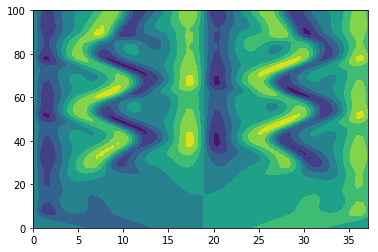

In [4]:
plt.contourf(x,t,Exact)

### 2.4 Define the size of the NN

In [5]:
layers = [2, 20, 20, 1]

# MODIFY THE KS_PINN class first
model = KS_PINN(layers, lb, ub)

#### 2.4.1 Data-case: Train the NN from randomly distributed points in the domain

In [6]:
model.reset_weights()
# randomly picked points for the data-only training of the NN
Ntrain = 1000
idx = np.random.choice(X_all.shape[0], Ntrain, replace=False)
X_trainData = X_all[idx, :]
u_trainData = Uexact_all[idx,:]

start_time = time.time()
model.train_data(X_trainData[:,0:1],X_trainData[:,1:],u_trainData)
elapsed_Data = time.time() - start_time                
print('Training time: %.4f' % (elapsed_Data))

('Loss:', 1.3105888)
('Loss:', 1.941066)
('Loss:', 1.2376598)
('Loss:', 1.2275699)
('Loss:', 1.2259451)
('Loss:', 1.2256337)
('Loss:', 1.2253815)
('Loss:', 1.2244256)
('Loss:', 1.2226726)
('Loss:', 1.2198281)
('Loss:', 1.2142414)
('Loss:', 1.2365636)
('Loss:', 1.2094212)
('Loss:', 1.2111666)
('Loss:', 1.2061847)
('Loss:', 1.2039611)
('Loss:', 1.2026272)
('Loss:', 1.201815)
('Loss:', 1.2004927)
('Loss:', 1.1988573)
('Loss:', 1.1941332)
('Loss:', 1.1949463)
('Loss:', 1.1925565)
('Loss:', 1.1919214)
('Loss:', 1.1911931)
('Loss:', 1.1893352)
('Loss:', 1.2369035)
('Loss:', 1.1867722)
('Loss:', 1.1850125)
('Loss:', 1.1840408)
('Loss:', 1.179313)
('Loss:', 1.223293)
('Loss:', 1.1751335)
('Loss:', 1.1608274)
('Loss:', 1.1558303)
('Loss:', 1.155284)
('Loss:', 1.1538732)
('Loss:', 1.155071)
('Loss:', 1.1536218)
('Loss:', 1.153386)
('Loss:', 1.1528852)
('Loss:', 1.1523482)
('Loss:', 1.1510496)
('Loss:', 1.1584586)
('Loss:', 1.1501626)
('Loss:', 1.1495801)
('Loss:', 1.1493032)
('Loss:', 1.14786)
(

('Loss:', 0.566654)
('Loss:', 0.5661216)
('Loss:', 0.56553465)
('Loss:', 0.56784827)
('Loss:', 0.5650781)
('Loss:', 0.56346875)
('Loss:', 0.5620403)
('Loss:', 0.5628009)
('Loss:', 0.560596)
('Loss:', 0.55953777)
('Loss:', 0.5578258)
('Loss:', 0.55735487)
('Loss:', 0.5556486)
('Loss:', 0.5544228)
('Loss:', 0.5529635)
('Loss:', 0.5530298)
('Loss:', 0.5518362)
('Loss:', 0.5518911)
('Loss:', 0.55099773)
('Loss:', 0.550242)
('Loss:', 0.54947144)
('Loss:', 0.5490486)
('Loss:', 0.5485891)
('Loss:', 0.54750717)
('Loss:', 0.5469054)
('Loss:', 0.54646516)
('Loss:', 0.54617935)
('Loss:', 0.54592115)
('Loss:', 0.54533476)
('Loss:', 0.54549485)
('Loss:', 0.5445383)
('Loss:', 0.5434899)
('Loss:', 0.5427464)
('Loss:', 0.5422235)
('Loss:', 0.5414283)
('Loss:', 0.53905505)
('Loss:', 0.53695697)
('Loss:', 0.5336531)
('Loss:', 0.5338555)
('Loss:', 0.531611)
('Loss:', 0.5284524)
('Loss:', 0.5267772)
('Loss:', 0.5261151)
('Loss:', 0.5266006)
('Loss:', 0.52510643)
('Loss:', 0.5243374)
('Loss:', 0.5237825)
(

('Loss:', 0.35061175)
('Loss:', 0.3504619)
('Loss:', 0.3503315)
('Loss:', 0.3502098)
('Loss:', 0.35011908)
('Loss:', 0.34999335)
('Loss:', 0.34982985)
('Loss:', 0.34970328)
('Loss:', 0.34934655)
('Loss:', 0.34915617)
('Loss:', 0.3488744)
('Loss:', 0.34855238)
('Loss:', 0.34822536)
('Loss:', 0.34763816)
('Loss:', 0.34732196)
('Loss:', 0.34703845)
('Loss:', 0.34685156)
('Loss:', 0.3467084)
('Loss:', 0.3465102)
('Loss:', 0.34608275)
('Loss:', 0.34585473)
('Loss:', 0.34637818)
('Loss:', 0.34567657)
('Loss:', 0.34537846)
('Loss:', 0.34488645)
('Loss:', 0.34451252)
('Loss:', 0.34423083)
('Loss:', 0.34390527)
('Loss:', 0.34360728)
('Loss:', 0.34329432)
('Loss:', 0.34296072)
('Loss:', 0.3423742)
('Loss:', 0.34141377)
('Loss:', 0.34071198)
('Loss:', 0.34035534)
('Loss:', 0.3401682)
('Loss:', 0.33990404)
('Loss:', 0.34033406)
('Loss:', 0.3397259)
('Loss:', 0.33940405)
('Loss:', 0.3391898)
('Loss:', 0.33903736)
('Loss:', 0.3389207)
('Loss:', 0.33880824)
('Loss:', 0.33871424)
('Loss:', 0.338587)
(

('Loss:', 0.2699914)
('Loss:', 0.26988953)
('Loss:', 0.26973456)
('Loss:', 0.26958397)
('Loss:', 0.26938945)
('Loss:', 0.2692804)
('Loss:', 0.26908723)
('Loss:', 0.26891765)
('Loss:', 0.26882505)
('Loss:', 0.2687334)
('Loss:', 0.2686604)
('Loss:', 0.26855677)
('Loss:', 0.2684499)
('Loss:', 0.26834258)
('Loss:', 0.2680536)
('Loss:', 0.26834393)
('Loss:', 0.26794136)
('Loss:', 0.2678561)
('Loss:', 0.26773116)
('Loss:', 0.26767784)
('Loss:', 0.2675127)
('Loss:', 0.26730427)
('Loss:', 0.26702404)
('Loss:', 0.2668268)
('Loss:', 0.26670745)
('Loss:', 0.26658583)
('Loss:', 0.2663893)
('Loss:', 0.2662904)
('Loss:', 0.26604232)
('Loss:', 0.26593256)
('Loss:', 0.2658176)
('Loss:', 0.2655846)
('Loss:', 0.26533386)
('Loss:', 0.26503924)
('Loss:', 0.2648258)
('Loss:', 0.26466784)
('Loss:', 0.2645068)
('Loss:', 0.264422)
('Loss:', 0.26434675)
('Loss:', 0.26427656)
('Loss:', 0.26419738)
('Loss:', 0.2640271)
('Loss:', 0.2639138)
('Loss:', 0.26380903)
('Loss:', 0.26369622)
('Loss:', 0.26360685)
('Loss:

('Loss:', 0.22747403)
('Loss:', 0.22741929)
('Loss:', 0.2273513)
('Loss:', 0.22725661)
('Loss:', 0.22714847)
('Loss:', 0.22707976)
('Loss:', 0.22696683)
('Loss:', 0.22683649)
('Loss:', 0.22697838)
('Loss:', 0.22677162)
('Loss:', 0.22671708)
('Loss:', 0.2266724)
('Loss:', 0.22664873)
('Loss:', 0.22658849)
('Loss:', 0.22651038)
('Loss:', 0.22656152)
('Loss:', 0.2264565)
('Loss:', 0.22633377)
('Loss:', 0.2262543)
('Loss:', 0.22629662)
('Loss:', 0.22620276)
('Loss:', 0.22614627)
('Loss:', 0.22609437)
('Loss:', 0.22602871)
('Loss:', 0.22596979)
('Loss:', 0.22591761)
('Loss:', 0.2258561)
('Loss:', 0.22580947)
('Loss:', 0.22574787)
('Loss:', 0.22571164)
('Loss:', 0.2256567)
('Loss:', 0.22560117)
('Loss:', 0.2255769)
('Loss:', 0.22554858)
('Loss:', 0.22551365)
('Loss:', 0.22546646)
('Loss:', 0.22540903)
('Loss:', 0.22536346)
('Loss:', 0.22532627)
('Loss:', 0.22527415)
('Loss:', 0.225169)
('Loss:', 0.22512223)
('Loss:', 0.22503783)
('Loss:', 0.22497517)
('Loss:', 0.22484533)
('Loss:', 0.2249170

('Loss:', 0.20974542)
('Loss:', 0.20972052)
('Loss:', 0.20967901)
('Loss:', 0.20966023)
('Loss:', 0.20965312)
('Loss:', 0.2096282)
('Loss:', 0.20961867)
('Loss:', 0.20960262)
('Loss:', 0.20958577)
('Loss:', 0.20955564)
('Loss:', 0.2095382)
('Loss:', 0.20951474)
('Loss:', 0.20945597)
('Loss:', 0.20943168)
('Loss:', 0.20940246)
('Loss:', 0.20939396)
('Loss:', 0.20936316)
('Loss:', 0.20934421)
('Loss:', 0.20931849)
('Loss:', 0.20929086)
('Loss:', 0.20924665)
('Loss:', 0.20946501)
('Loss:', 0.2092381)
('Loss:', 0.2092182)
('Loss:', 0.20919293)
('Loss:', 0.20917092)
('Loss:', 0.20917805)
('Loss:', 0.2091514)
('Loss:', 0.20912743)
('Loss:', 0.20911245)
('Loss:', 0.20909742)
('Loss:', 0.20906681)
('Loss:', 0.20906055)
('Loss:', 0.20903473)
('Loss:', 0.20902179)
('Loss:', 0.20899968)
('Loss:', 0.20898722)
('Loss:', 0.20895956)
('Loss:', 0.20894717)
('Loss:', 0.20893033)
('Loss:', 0.20891976)
('Loss:', 0.20890558)
('Loss:', 0.20888682)
('Loss:', 0.20887579)
('Loss:', 0.20885764)
('Loss:', 0.208

('Loss:', 0.19876954)
('Loss:', 0.19872116)
('Loss:', 0.19867723)
('Loss:', 0.19864723)
('Loss:', 0.19861487)
('Loss:', 0.19860096)
('Loss:', 0.1985906)
('Loss:', 0.19857657)
('Loss:', 0.19854997)
('Loss:', 0.1985425)
('Loss:', 0.19850546)
('Loss:', 0.19847247)
('Loss:', 0.19844317)
('Loss:', 0.19841127)
('Loss:', 0.19839126)
('Loss:', 0.19837636)
('Loss:', 0.19833618)
('Loss:', 0.1983116)
('Loss:', 0.1982837)
('Loss:', 0.198267)
('Loss:', 0.19824539)
('Loss:', 0.19826362)
('Loss:', 0.19823185)
('Loss:', 0.19820893)
('Loss:', 0.19818442)
('Loss:', 0.19815661)
('Loss:', 0.19813201)
('Loss:', 0.19811097)
('Loss:', 0.19808103)
('Loss:', 0.19804116)
('Loss:', 0.19799405)
('Loss:', 0.19795382)
('Loss:', 0.19792512)
('Loss:', 0.1979064)
('Loss:', 0.19788739)
('Loss:', 0.197859)
('Loss:', 0.19792712)
('Loss:', 0.1978443)
('Loss:', 0.19780982)
('Loss:', 0.19779013)
('Loss:', 0.19776656)
('Loss:', 0.19773704)
('Loss:', 0.1976984)
('Loss:', 0.19765206)
('Loss:', 0.19762015)
('Loss:', 0.19756901)

('Loss:', 0.18969017)
('Loss:', 0.18968014)
('Loss:', 0.1896702)
('Loss:', 0.18966195)
('Loss:', 0.18964581)
('Loss:', 0.18961465)
('Loss:', 0.18958344)
('Loss:', 0.18954767)
('Loss:', 0.18951672)
('Loss:', 0.18948007)
('Loss:', 0.18943061)
('Loss:', 0.19056803)
('Loss:', 0.1894119)
('Loss:', 0.18938598)
('Loss:', 0.18934198)
('Loss:', 0.18934399)
('Loss:', 0.189323)
('Loss:', 0.18930082)
('Loss:', 0.18928388)
('Loss:', 0.1892635)
('Loss:', 0.18924937)
('Loss:', 0.18922928)
('Loss:', 0.18919988)
('Loss:', 0.18916307)
('Loss:', 0.18913767)
('Loss:', 0.18911132)
('Loss:', 0.189088)
('Loss:', 0.18907657)
('Loss:', 0.18904458)
('Loss:', 0.18902072)
('Loss:', 0.1889937)
('Loss:', 0.18895279)
('Loss:', 0.18893404)
('Loss:', 0.18890405)
('Loss:', 0.18886627)
('Loss:', 0.18881589)
('Loss:', 0.18875179)
('Loss:', 0.18873273)
('Loss:', 0.1887538)
('Loss:', 0.18870987)
('Loss:', 0.18868469)
('Loss:', 0.188668)
('Loss:', 0.18863851)
('Loss:', 0.18859006)
('Loss:', 0.18862295)
('Loss:', 0.18856259)

('Loss:', 0.1702341)
('Loss:', 0.17015548)
('Loss:', 0.1700906)
('Loss:', 0.17004143)
('Loss:', 0.16993324)
('Loss:', 0.17022778)
('Loss:', 0.16979156)
('Loss:', 0.16969174)
('Loss:', 0.16958942)
('Loss:', 0.16954552)
('Loss:', 0.16966985)
('Loss:', 0.16953106)
('Loss:', 0.16950074)
('Loss:', 0.16941977)
('Loss:', 0.16937041)
('Loss:', 0.16926435)
('Loss:', 0.16915311)
('Loss:', 0.16915724)
('Loss:', 0.16910265)
('Loss:', 0.16902994)
('Loss:', 0.16891202)
('Loss:', 0.16879481)
('Loss:', 0.16864502)
('Loss:', 0.16855282)
('Loss:', 0.16846871)
('Loss:', 0.1684032)
('Loss:', 0.16832308)
('Loss:', 0.16825573)
('Loss:', 0.16821863)
('Loss:', 0.16816182)
('Loss:', 0.16812232)
('Loss:', 0.16815588)
('Loss:', 0.168058)
('Loss:', 0.1680141)
('Loss:', 0.16793343)
('Loss:', 0.16787845)
('Loss:', 0.1678272)
('Loss:', 0.1678286)
('Loss:', 0.16780512)
('Loss:', 0.16777371)
('Loss:', 0.1677367)
('Loss:', 0.16771613)
('Loss:', 0.1676708)
('Loss:', 0.16768375)
('Loss:', 0.16763458)
('Loss:', 0.16755883

('Loss:', 0.15575418)
('Loss:', 0.15573221)
('Loss:', 0.15569511)
('Loss:', 0.1558587)
('Loss:', 0.15567975)
('Loss:', 0.15563223)
('Loss:', 0.15559824)
('Loss:', 0.15555552)
('Loss:', 0.15602918)
('Loss:', 0.15554418)
('Loss:', 0.15550095)
('Loss:', 0.15543938)
('Loss:', 0.15539469)
('Loss:', 0.1553332)
('Loss:', 0.15531345)
('Loss:', 0.15524659)
('Loss:', 0.15535095)
('Loss:', 0.15523005)
('Loss:', 0.1551964)
('Loss:', 0.15516669)
('Loss:', 0.15512711)
('Loss:', 0.15510428)
('Loss:', 0.15508588)
('Loss:', 0.1550596)
('Loss:', 0.15511145)
('Loss:', 0.15504038)
('Loss:', 0.15501724)
('Loss:', 0.15498148)
('Loss:', 0.15524144)
('Loss:', 0.15497825)
('Loss:', 0.15496878)
('Loss:', 0.15493384)
('Loss:', 0.15487444)
('Loss:', 0.15485929)
('Loss:', 0.15479532)
('Loss:', 0.15477107)
('Loss:', 0.15473403)
('Loss:', 0.15471844)
('Loss:', 0.15466765)
('Loss:', 0.15463996)
('Loss:', 0.1545901)
('Loss:', 0.15456094)
('Loss:', 0.15454254)
('Loss:', 0.1545185)
('Loss:', 0.15448008)
('Loss:', 0.1544

('Loss:', 0.14346924)
('Loss:', 0.14343207)
('Loss:', 0.143405)
('Loss:', 0.14350286)
('Loss:', 0.14339735)
('Loss:', 0.14338358)
('Loss:', 0.14336891)
('Loss:', 0.14334832)
('Loss:', 0.14330871)
('Loss:', 0.14327885)
('Loss:', 0.14324112)
('Loss:', 0.14321484)
('Loss:', 0.14319675)
('Loss:', 0.1431835)
('Loss:', 0.14323519)
('Loss:', 0.14316589)
('Loss:', 0.14313883)
('Loss:', 0.14311406)
('Loss:', 0.14309187)
('Loss:', 0.14307217)
('Loss:', 0.14304632)
('Loss:', 0.14302246)
('Loss:', 0.1429963)
('Loss:', 0.14297497)
('Loss:', 0.14296512)
('Loss:', 0.14294651)
('Loss:', 0.14292209)
('Loss:', 0.14288993)
('Loss:', 0.14285654)
('Loss:', 0.14282769)
('Loss:', 0.14280184)
('Loss:', 0.14277089)
('Loss:', 0.1427464)
('Loss:', 0.1427263)
('Loss:', 0.14271304)
('Loss:', 0.1426993)
('Loss:', 0.142698)
('Loss:', 0.14268918)
('Loss:', 0.14266983)
('Loss:', 0.14265826)
('Loss:', 0.14263506)
('Loss:', 0.14261013)
('Loss:', 0.14255682)
('Loss:', 0.14249933)
('Loss:', 0.1429252)
('Loss:', 0.14248203

('Loss:', 0.13237716)
('Loss:', 0.1323396)
('Loss:', 0.13230796)
('Loss:', 0.13223849)
('Loss:', 0.13232853)
('Loss:', 0.1322231)
('Loss:', 0.13218866)
('Loss:', 0.13216937)
('Loss:', 0.13215248)
('Loss:', 0.13212006)
('Loss:', 0.1320641)
('Loss:', 0.13200694)
('Loss:', 0.13198042)
('Loss:', 0.13190915)
('Loss:', 0.13187237)
('Loss:', 0.13183735)
('Loss:', 0.13183165)
('Loss:', 0.13178891)
('Loss:', 0.13177258)
('Loss:', 0.1317483)
('Loss:', 0.13172728)
('Loss:', 0.13170096)
('Loss:', 0.13168041)
('Loss:', 0.13166554)
('Loss:', 0.13162069)
('Loss:', 0.13159034)
('Loss:', 0.13154581)
('Loss:', 0.13151608)
('Loss:', 0.13148515)
('Loss:', 0.13147372)
('Loss:', 0.13145554)
('Loss:', 0.13140811)
('Loss:', 0.13138682)
('Loss:', 0.13134702)
('Loss:', 0.13147894)
('Loss:', 0.13130051)
('Loss:', 0.13124676)
('Loss:', 0.13119827)
('Loss:', 0.13115174)
('Loss:', 0.13107324)
('Loss:', 0.13102487)
('Loss:', 0.13096946)
('Loss:', 0.13089116)
('Loss:', 0.13086851)
('Loss:', 0.13083445)
('Loss:', 0.13

('Loss:', 0.12182652)
('Loss:', 0.121788405)
('Loss:', 0.12176691)
('Loss:', 0.12173027)
('Loss:', 0.121705495)
('Loss:', 0.12166416)
('Loss:', 0.12163859)
('Loss:', 0.121610075)
('Loss:', 0.12158705)
('Loss:', 0.12160706)
('Loss:', 0.12157233)
('Loss:', 0.121545866)
('Loss:', 0.12152676)
('Loss:', 0.12150545)
('Loss:', 0.121480085)
('Loss:', 0.12152555)
('Loss:', 0.12146813)
('Loss:', 0.12144676)
('Loss:', 0.12143666)
('Loss:', 0.1214279)
('Loss:', 0.12141075)
('Loss:', 0.12137959)
('Loss:', 0.12136077)
('Loss:', 0.121340945)
('Loss:', 0.121312484)
('Loss:', 0.12129274)
('Loss:', 0.12124742)
('Loss:', 0.12121454)
('Loss:', 0.121213354)
('Loss:', 0.12119783)
('Loss:', 0.12116365)
('Loss:', 0.121130675)
('Loss:', 0.12109761)
('Loss:', 0.12107506)
('Loss:', 0.121486664)
('Loss:', 0.121068336)
('Loss:', 0.12105779)
('Loss:', 0.12103921)
('Loss:', 0.12102666)
('Loss:', 0.12100046)
('Loss:', 0.12096731)
('Loss:', 0.12090835)
('Loss:', 0.120942906)
('Loss:', 0.12088272)
('Loss:', 0.120822564

('Loss:', 0.11482594)
('Loss:', 0.114746965)
('Loss:', 0.1147332)
('Loss:', 0.11471822)
('Loss:', 0.11471201)
('Loss:', 0.1147029)
('Loss:', 0.11468244)
('Loss:', 0.11469362)
('Loss:', 0.1146664)
('Loss:', 0.114632875)
('Loss:', 0.1146096)
('Loss:', 0.11457553)
('Loss:', 0.11455183)
('Loss:', 0.11452609)
('Loss:', 0.11448013)
('Loss:', 0.11444999)
('Loss:', 0.11442216)
('Loss:', 0.11448774)
('Loss:', 0.11440419)
('Loss:', 0.11437797)
('Loss:', 0.11435149)
('Loss:', 0.11432443)
('Loss:', 0.11430139)
('Loss:', 0.11427543)
('Loss:', 0.11424897)
('Loss:', 0.11421832)
('Loss:', 0.11419851)
('Loss:', 0.114410155)
('Loss:', 0.114193)
('Loss:', 0.11417989)
('Loss:', 0.1141714)
('Loss:', 0.114162944)
('Loss:', 0.11414668)
('Loss:', 0.11412307)
('Loss:', 0.11410879)
('Loss:', 0.11409476)
('Loss:', 0.114084795)
('Loss:', 0.11406616)
('Loss:', 0.114048816)
('Loss:', 0.11403186)
('Loss:', 0.11400871)
('Loss:', 0.11398326)
('Loss:', 0.113950044)
('Loss:', 0.11394649)
('Loss:', 0.11391543)
('Loss:', 

('Loss:', 0.109334454)
('Loss:', 0.10931861)
('Loss:', 0.1093111)
('Loss:', 0.109286435)
('Loss:', 0.1092733)
('Loss:', 0.1092831)
('Loss:', 0.10927054)
('Loss:', 0.10926463)
('Loss:', 0.10925358)
('Loss:', 0.109243914)
('Loss:', 0.109227814)
('Loss:', 0.10932599)
('Loss:', 0.10922339)
('Loss:', 0.10921118)
('Loss:', 0.10920063)
('Loss:', 0.10919049)
('Loss:', 0.10917837)
('Loss:', 0.10916263)
('Loss:', 0.109151535)
('Loss:', 0.10914842)
('Loss:', 0.10913784)
('Loss:', 0.10913426)
('Loss:', 0.10912863)
('Loss:', 0.10912011)
('Loss:', 0.109111756)
('Loss:', 0.10909696)
('Loss:', 0.10908879)
('Loss:', 0.109076336)
('Loss:', 0.10906614)
('Loss:', 0.109054275)
('Loss:', 0.10904025)
('Loss:', 0.1090247)
('Loss:', 0.109013855)
('Loss:', 0.10900229)
('Loss:', 0.10897492)
('Loss:', 0.10896638)
('Loss:', 0.10895189)
('Loss:', 0.10893503)
('Loss:', 0.10892893)
('Loss:', 0.10891385)
('Loss:', 0.10890964)
('Loss:', 0.10890239)
('Loss:', 0.10889949)
('Loss:', 0.10888597)
('Loss:', 0.10887884)
('Los

('Loss:', 0.10462997)
('Loss:', 0.104620285)
('Loss:', 0.10461574)
('Loss:', 0.10460555)
('Loss:', 0.10458874)
('Loss:', 0.104564264)
('Loss:', 0.10460042)
('Loss:', 0.104556866)
('Loss:', 0.10453921)
('Loss:', 0.10452808)
('Loss:', 0.104516976)
('Loss:', 0.104508996)
('Loss:', 0.104498826)
('Loss:', 0.10449078)
('Loss:', 0.10448441)
('Loss:', 0.1044766)
('Loss:', 0.10447079)
('Loss:', 0.10446245)
('Loss:', 0.1044503)
('Loss:', 0.10446103)
('Loss:', 0.104439944)
('Loss:', 0.104424834)
('Loss:', 0.104414366)
('Loss:', 0.104404554)
('Loss:', 0.10438682)
('Loss:', 0.10437505)
('Loss:', 0.10436824)
('Loss:', 0.1043593)
('Loss:', 0.10434004)
('Loss:', 0.10435715)
('Loss:', 0.10433077)
('Loss:', 0.10431375)
('Loss:', 0.1043003)
('Loss:', 0.10429624)
('Loss:', 0.10428209)
('Loss:', 0.104274414)
('Loss:', 0.10426645)
('Loss:', 0.10425966)
('Loss:', 0.10423976)
('Loss:', 0.10422836)
('Loss:', 0.10421262)
('Loss:', 0.104201086)
('Loss:', 0.10419205)
('Loss:', 0.10418127)
('Loss:', 0.10416756)
('

('Loss:', 0.10105126)
('Loss:', 0.101041794)
('Loss:', 0.10103395)
('Loss:', 0.101026006)
('Loss:', 0.10101868)
('Loss:', 0.101009235)
('Loss:', 0.10100542)
('Loss:', 0.100992665)
('Loss:', 0.100985065)
('Loss:', 0.10097425)
('Loss:', 0.10097894)
('Loss:', 0.100969635)
('Loss:', 0.10095993)
('Loss:', 0.10095212)
('Loss:', 0.10094919)
('Loss:', 0.10093655)
('Loss:', 0.100954294)
('Loss:', 0.1009313)
('Loss:', 0.100916855)
('Loss:', 0.100909755)
('Loss:', 0.10090125)
('Loss:', 0.10089633)
('Loss:', 0.10088762)
('Loss:', 0.10087715)
('Loss:', 0.10086371)
('Loss:', 0.10085428)
('Loss:', 0.100843094)
('Loss:', 0.10083767)
('Loss:', 0.10083262)
('Loss:', 0.10082562)
('Loss:', 0.100831576)
('Loss:', 0.10082203)
('Loss:', 0.10081648)
('Loss:', 0.10080824)
('Loss:', 0.10080336)
('Loss:', 0.100787066)
('Loss:', 0.10077349)
('Loss:', 0.100763)
('Loss:', 0.10075586)
('Loss:', 0.10074894)
('Loss:', 0.10074138)
('Loss:', 0.10073298)
('Loss:', 0.10072803)
('Loss:', 0.100721605)
('Loss:', 0.10071599)


('Loss:', 0.09836009)
('Loss:', 0.09834288)
('Loss:', 0.09845655)
('Loss:', 0.09833876)
('Loss:', 0.09832818)
('Loss:', 0.09831954)
('Loss:', 0.09831273)
('Loss:', 0.098307565)
('Loss:', 0.09829928)
('Loss:', 0.098314255)
('Loss:', 0.098295674)
('Loss:', 0.09828684)
('Loss:', 0.09828054)
('Loss:', 0.09827678)
('Loss:', 0.09827291)
('Loss:', 0.09827155)
('Loss:', 0.09826628)
('Loss:', 0.098264374)
('Loss:', 0.098261856)
('Loss:', 0.09825788)
('Loss:', 0.09825342)
('Loss:', 0.09824779)
('Loss:', 0.09824162)
('Loss:', 0.098233886)
('Loss:', 0.098237045)
('Loss:', 0.09822883)
('Loss:', 0.09822011)
('Loss:', 0.098211855)
('Loss:', 0.09820666)
('Loss:', 0.09819852)
('Loss:', 0.098188505)
('Loss:', 0.09817764)
('Loss:', 0.098166876)
('Loss:', 0.09816342)
('Loss:', 0.09815752)
('Loss:', 0.09815253)
('Loss:', 0.09814319)
('Loss:', 0.0982567)
('Loss:', 0.09814096)
('Loss:', 0.09813148)
('Loss:', 0.098119676)
('Loss:', 0.09811088)
('Loss:', 0.09811272)
('Loss:', 0.098106064)
('Loss:', 0.09809981)

('Loss:', 0.0948611)
('Loss:', 0.094853416)
('Loss:', 0.09484061)
('Loss:', 0.094824955)
('Loss:', 0.09481607)
('Loss:', 0.0948011)
('Loss:', 0.09478389)
('Loss:', 0.09476788)
('Loss:', 0.09476008)
('Loss:', 0.09474923)
('Loss:', 0.0947408)
('Loss:', 0.09473057)
('Loss:', 0.094724774)
('Loss:', 0.09472001)
('Loss:', 0.094716445)
('Loss:', 0.0947127)
('Loss:', 0.09470592)
('Loss:', 0.09469159)
('Loss:', 0.09468316)
('Loss:', 0.09466162)
('Loss:', 0.09465029)
('Loss:', 0.0946449)
('Loss:', 0.09463068)
('Loss:', 0.09461897)
('Loss:', 0.094601884)
('Loss:', 0.094590515)
('Loss:', 0.09458127)
('Loss:', 0.09456049)
('Loss:', 0.09455173)
('Loss:', 0.09454231)
('Loss:', 0.0945349)
('Loss:', 0.0945152)
('Loss:', 0.094512254)
('Loss:', 0.09448734)
('Loss:', 0.09447676)
('Loss:', 0.09446424)
('Loss:', 0.09445084)
('Loss:', 0.09446847)
('Loss:', 0.09444477)
('Loss:', 0.09443361)
('Loss:', 0.094427094)
('Loss:', 0.094406754)
('Loss:', 0.0943859)
('Loss:', 0.094371065)
('Loss:', 0.09435786)
('Loss:'

('Loss:', 0.09096832)
('Loss:', 0.0909646)
('Loss:', 0.09096244)
('Loss:', 0.090961635)
('Loss:', 0.09095716)
('Loss:', 0.09095586)
('Loss:', 0.09095363)
('Loss:', 0.09095151)
('Loss:', 0.09094559)
('Loss:', 0.09094289)
('Loss:', 0.09093404)
('Loss:', 0.09093052)
('Loss:', 0.09092737)
('Loss:', 0.09092462)
('Loss:', 0.090918735)
('Loss:', 0.09093103)
('Loss:', 0.090915106)
('Loss:', 0.09090596)
('Loss:', 0.0908987)
('Loss:', 0.090894744)
('Loss:', 0.090891436)
('Loss:', 0.09088656)
('Loss:', 0.09088233)
('Loss:', 0.09087804)
('Loss:', 0.090873964)
('Loss:', 0.090869784)
('Loss:', 0.09086603)
('Loss:', 0.09085523)
('Loss:', 0.09084932)
('Loss:', 0.090845026)
('Loss:', 0.09084112)
('Loss:', 0.09083673)
('Loss:', 0.090825304)
('Loss:', 0.09082025)
('Loss:', 0.09081564)
('Loss:', 0.09081555)
('Loss:', 0.09081303)
('Loss:', 0.090808354)
('Loss:', 0.09081215)
('Loss:', 0.09080441)
('Loss:', 0.09079967)
('Loss:', 0.09079573)
('Loss:', 0.090784796)
('Loss:', 0.090779185)
('Loss:', 0.090771675)

('Loss:', 0.08886589)
('Loss:', 0.08881509)
('Loss:', 0.08880509)
('Loss:', 0.0887989)
('Loss:', 0.08879453)
('Loss:', 0.08879033)
('Loss:', 0.088782385)
('Loss:', 0.08880485)
('Loss:', 0.088780016)
('Loss:', 0.0887732)
('Loss:', 0.08876894)
('Loss:', 0.088763766)
('Loss:', 0.08875823)
('Loss:', 0.088760465)
('Loss:', 0.088754214)
('Loss:', 0.08874825)
('Loss:', 0.088741094)
('Loss:', 0.0887384)
('Loss:', 0.08872945)
('Loss:', 0.08871932)
('Loss:', 0.088747256)
('Loss:', 0.08871532)
('Loss:', 0.088707164)
('Loss:', 0.08870163)
('Loss:', 0.08869503)
('Loss:', 0.08869083)
('Loss:', 0.088687524)
('Loss:', 0.08868352)
('Loss:', 0.08868103)
('Loss:', 0.08867747)
('Loss:', 0.088671565)
('Loss:', 0.08866938)
('Loss:', 0.08866263)
('Loss:', 0.08866022)
('Loss:', 0.08865624)
('Loss:', 0.088650405)
('Loss:', 0.0886448)
('Loss:', 0.0886395)
('Loss:', 0.088636465)
('Loss:', 0.088629365)
('Loss:', 0.08862698)
('Loss:', 0.08862012)
('Loss:', 0.08862039)
('Loss:', 0.08861701)
('Loss:', 0.08861452)
('

('Loss:', 0.08705345)
('Loss:', 0.087051176)
('Loss:', 0.08704809)
('Loss:', 0.08704547)
('Loss:', 0.08704081)
('Loss:', 0.08703904)
('Loss:', 0.08703603)
('Loss:', 0.08703025)
('Loss:', 0.08702481)
('Loss:', 0.0870202)
('Loss:', 0.087017715)
('Loss:', 0.08701486)
('Loss:', 0.087012194)
('Loss:', 0.087005325)
('Loss:', 0.08701202)
('Loss:', 0.08700218)
('Loss:', 0.08699487)
('Loss:', 0.086986035)
('Loss:', 0.08697999)
('Loss:', 0.08697677)
('Loss:', 0.08697304)
('Loss:', 0.086970344)
('Loss:', 0.086964235)
('Loss:', 0.08695671)
('Loss:', 0.086965926)
('Loss:', 0.086953625)
('Loss:', 0.08694532)
('Loss:', 0.08694121)
('Loss:', 0.08693519)
('Loss:', 0.08693086)
('Loss:', 0.08692586)
('Loss:', 0.08691821)
('Loss:', 0.08691334)
('Loss:', 0.08690998)
('Loss:', 0.08690002)
('Loss:', 0.08689398)
('Loss:', 0.08688635)
('Loss:', 0.086878315)
('Loss:', 0.08686994)
('Loss:', 0.08686726)
('Loss:', 0.08686125)
('Loss:', 0.08685811)
('Loss:', 0.08685468)
('Loss:', 0.08685557)
('Loss:', 0.08685189)
(

('Loss:', 0.08458127)
('Loss:', 0.08456462)
('Loss:', 0.084550515)
('Loss:', 0.084544234)
('Loss:', 0.084535725)
('Loss:', 0.084520325)
('Loss:', 0.08450247)
('Loss:', 0.0844823)
('Loss:', 0.084464096)
('Loss:', 0.084447116)
('Loss:', 0.084434494)
('Loss:', 0.08440552)
('Loss:', 0.084396265)
('Loss:', 0.0843737)
('Loss:', 0.084363595)
('Loss:', 0.08434055)
('Loss:', 0.08432455)
('Loss:', 0.08431247)
('Loss:', 0.08432687)
('Loss:', 0.084305435)
('Loss:', 0.084289275)
('Loss:', 0.08427481)
('Loss:', 0.08426112)
('Loss:', 0.08425318)
('Loss:', 0.08423946)
('Loss:', 0.08422642)
('Loss:', 0.08420019)
('Loss:', 0.084182076)
('Loss:', 0.08417046)
('Loss:', 0.08417414)
('Loss:', 0.08416182)
('Loss:', 0.08415456)
('Loss:', 0.084143005)
('Loss:', 0.0841367)
('Loss:', 0.08412479)
('Loss:', 0.084126554)
('Loss:', 0.0841201)
('Loss:', 0.08411278)
('Loss:', 0.084110156)
('Loss:', 0.08410498)
('Loss:', 0.08409963)
('Loss:', 0.0840927)
('Loss:', 0.08408501)
('Loss:', 0.08407829)
('Loss:', 0.08416799)


('Loss:', 0.08136891)
('Loss:', 0.08135353)
('Loss:', 0.081424996)
('Loss:', 0.08134919)
('Loss:', 0.08133864)
('Loss:', 0.08133197)
('Loss:', 0.08131729)
('Loss:', 0.08130014)
('Loss:', 0.082037814)
('Loss:', 0.081299014)
('Loss:', 0.08129228)
('Loss:', 0.08128373)
('Loss:', 0.081275605)
('Loss:', 0.081261925)
('Loss:', 0.081249766)
('Loss:', 0.081240386)
('Loss:', 0.08122754)
('Loss:', 0.08121959)
('Loss:', 0.08121051)
('Loss:', 0.081209)
('Loss:', 0.08119932)
('Loss:', 0.081194304)
('Loss:', 0.08118663)
('Loss:', 0.081178054)
('Loss:', 0.0811578)
('Loss:', 0.08116135)
('Loss:', 0.08115144)
('Loss:', 0.081149034)
('Loss:', 0.08114295)
('Loss:', 0.08114061)
('Loss:', 0.08113593)
('Loss:', 0.0811283)
('Loss:', 0.081117995)
('Loss:', 0.08112219)
('Loss:', 0.08111151)
('Loss:', 0.0811031)
('Loss:', 0.0810956)
('Loss:', 0.08108867)
('Loss:', 0.08108329)
('Loss:', 0.081076264)
('Loss:', 0.08106846)
('Loss:', 0.08105989)
('Loss:', 0.08107002)
('Loss:', 0.08105601)
('Loss:', 0.08104694)
('Lo

('Loss:', 0.07705595)
('Loss:', 0.077042654)
('Loss:', 0.077016726)
('Loss:', 0.07702054)
('Loss:', 0.077005744)
('Loss:', 0.076991916)
('Loss:', 0.0769803)
('Loss:', 0.07697041)
('Loss:', 0.07697963)
('Loss:', 0.076962404)
('Loss:', 0.07695037)
('Loss:', 0.07694128)
('Loss:', 0.076938726)
('Loss:', 0.07693556)
('Loss:', 0.07693176)
('Loss:', 0.07692848)
('Loss:', 0.0769234)
('Loss:', 0.076909)
('Loss:', 0.07690171)
('Loss:', 0.076897375)
('Loss:', 0.07689453)
('Loss:', 0.076890886)
('Loss:', 0.07688588)
('Loss:', 0.076878116)
('Loss:', 0.076871365)
('Loss:', 0.07686461)
('Loss:', 0.076858394)
('Loss:', 0.07684906)
('Loss:', 0.07683885)
('Loss:', 0.076828554)
('Loss:', 0.07682289)
('Loss:', 0.07680777)
('Loss:', 0.07678888)
('Loss:', 0.076774634)
('Loss:', 0.07676793)
('Loss:', 0.076753765)
('Loss:', 0.076748915)
('Loss:', 0.07673766)
('Loss:', 0.076727)
('Loss:', 0.07671155)
('Loss:', 0.07670131)
('Loss:', 0.07668743)
('Loss:', 0.07668444)
('Loss:', 0.07667846)
('Loss:', 0.076672785)


('Loss:', 0.07364921)
('Loss:', 0.073639065)
('Loss:', 0.07363101)
('Loss:', 0.073625974)
('Loss:', 0.073620275)
('Loss:', 0.0736145)
('Loss:', 0.07360981)
('Loss:', 0.07362021)
('Loss:', 0.07360818)
('Loss:', 0.07360571)
('Loss:', 0.07359869)
('Loss:', 0.07358716)
('Loss:', 0.073577836)
('Loss:', 0.073573)
('Loss:', 0.07356792)
('Loss:', 0.07356403)
('Loss:', 0.07355995)
('Loss:', 0.073560424)
('Loss:', 0.07355658)
('Loss:', 0.0735508)
('Loss:', 0.07354583)
('Loss:', 0.073538296)
('Loss:', 0.07352966)
('Loss:', 0.0735511)
('Loss:', 0.07352412)
('Loss:', 0.07351466)
('Loss:', 0.07350534)
('Loss:', 0.07349381)
('Loss:', 0.07348202)
('Loss:', 0.07374855)
('Loss:', 0.07347902)
('Loss:', 0.073468156)
('Loss:', 0.07345956)
('Loss:', 0.07345308)
('Loss:', 0.073445216)
('Loss:', 0.07343299)
('Loss:', 0.07342384)
('Loss:', 0.07341021)
('Loss:', 0.07339712)
('Loss:', 0.073413335)
('Loss:', 0.07339237)
('Loss:', 0.0733822)
('Loss:', 0.07337695)
('Loss:', 0.073369116)
('Loss:', 0.07335658)
('Loss

('Loss:', 0.0711409)
('Loss:', 0.07113352)
('Loss:', 0.071129516)
('Loss:', 0.07112464)
('Loss:', 0.071119815)
('Loss:', 0.071229674)
('Loss:', 0.07111686)
('Loss:', 0.07111017)
('Loss:', 0.07110427)
('Loss:', 0.07109941)
('Loss:', 0.07109398)
('Loss:', 0.07108933)
('Loss:', 0.071085684)
('Loss:', 0.07108211)
('Loss:', 0.071077995)
('Loss:', 0.07107105)
('Loss:', 0.07108553)
('Loss:', 0.07106893)
('Loss:', 0.07106521)
('Loss:', 0.07106138)
('Loss:', 0.071056254)
('Loss:', 0.07105131)
('Loss:', 0.07104758)
('Loss:', 0.07104134)
('Loss:', 0.07103673)
('Loss:', 0.07103355)
('Loss:', 0.0710325)
('Loss:', 0.07102802)
('Loss:', 0.07102637)
('Loss:', 0.071023665)
('Loss:', 0.07101994)
('Loss:', 0.07107462)
('Loss:', 0.0710191)
('Loss:', 0.07101508)
('Loss:', 0.07101149)
('Loss:', 0.07100536)
('Loss:', 0.07100564)
('Loss:', 0.07100298)
('Loss:', 0.070998885)
('Loss:', 0.07099534)
('Loss:', 0.0709923)
('Loss:', 0.07098932)
('Loss:', 0.07098326)
('Loss:', 0.070989825)
('Loss:', 0.07097972)
('Los

('Loss:', 0.06933135)
('Loss:', 0.069325894)
('Loss:', 0.069317125)
('Loss:', 0.06930951)
('Loss:', 0.069295436)
('Loss:', 0.06931079)
('Loss:', 0.06929014)
('Loss:', 0.06928089)
('Loss:', 0.0692731)
('Loss:', 0.06926356)
('Loss:', 0.06925479)
('Loss:', 0.06924881)
('Loss:', 0.06924068)
('Loss:', 0.06923553)
('Loss:', 0.06923103)
('Loss:', 0.069233246)
('Loss:', 0.069227606)
('Loss:', 0.069221586)
('Loss:', 0.06921748)
('Loss:', 0.0692125)
('Loss:', 0.06920534)
('Loss:', 0.069194704)
('Loss:', 0.06918547)
('Loss:', 0.06918058)
('Loss:', 0.06917677)
('Loss:', 0.069171995)
('Loss:', 0.06915958)
('Loss:', 0.06915102)
('Loss:', 0.06913446)
('Loss:', 0.06912618)
('Loss:', 0.06912252)
('Loss:', 0.069119036)
('Loss:', 0.06911557)
('Loss:', 0.06910837)
('Loss:', 0.0691017)
('Loss:', 0.06909436)
('Loss:', 0.06908388)
('Loss:', 0.069078915)
('Loss:', 0.069070294)
('Loss:', 0.0690592)
('Loss:', 0.069156066)
('Loss:', 0.069057785)
('Loss:', 0.06905037)
('Loss:', 0.06904372)
('Loss:', 0.06903435)
(

('Loss:', 0.06701468)
('Loss:', 0.06700715)
('Loss:', 0.06700102)
('Loss:', 0.06699658)
('Loss:', 0.06699251)
('Loss:', 0.06698714)
('Loss:', 0.06697975)
('Loss:', 0.06697372)
('Loss:', 0.06696962)
('Loss:', 0.06696554)
('Loss:', 0.06695638)
('Loss:', 0.0669491)
('Loss:', 0.066944584)
('Loss:', 0.06693937)
('Loss:', 0.0669325)
('Loss:', 0.066927016)
('Loss:', 0.066937454)
('Loss:', 0.06692458)
('Loss:', 0.06692113)
('Loss:', 0.06691704)
('Loss:', 0.06691319)
('Loss:', 0.066909924)
('Loss:', 0.06690422)
('Loss:', 0.06689511)
('Loss:', 0.06688802)
('Loss:', 0.06688345)
('Loss:', 0.06687981)
('Loss:', 0.066873126)
('Loss:', 0.06686432)
('Loss:', 0.06686041)
('Loss:', 0.06685347)
('Loss:', 0.066849336)
('Loss:', 0.06684365)
('Loss:', 0.06683813)
('Loss:', 0.06683336)
('Loss:', 0.06682828)
('Loss:', 0.066821426)
('Loss:', 0.066813566)
('Loss:', 0.06691157)
('Loss:', 0.066811495)
('Loss:', 0.06680577)
('Loss:', 0.06680211)
('Loss:', 0.066799276)
('Loss:', 0.06679433)
('Loss:', 0.06678605)
('

('Loss:', 0.06468841)
('Loss:', 0.064682156)
('Loss:', 0.064675525)
('Loss:', 0.064666025)
('Loss:', 0.06464705)
('Loss:', 0.064660445)
('Loss:', 0.06463903)
('Loss:', 0.06463025)
('Loss:', 0.06462522)
('Loss:', 0.064619996)
('Loss:', 0.06460858)
('Loss:', 0.06460325)
('Loss:', 0.06460081)
('Loss:', 0.06459644)
('Loss:', 0.06459181)
('Loss:', 0.064580046)
('Loss:', 0.064569876)
('Loss:', 0.064596966)
('Loss:', 0.06456685)
('Loss:', 0.06456047)
('Loss:', 0.06455613)
('Loss:', 0.064552136)
('Loss:', 0.06454556)
('Loss:', 0.06454356)
('Loss:', 0.064537436)
('Loss:', 0.06453629)
('Loss:', 0.06453293)
('Loss:', 0.06452938)
('Loss:', 0.064524576)
('Loss:', 0.06451989)
('Loss:', 0.064514525)
('Loss:', 0.06451261)
('Loss:', 0.06450557)
('Loss:', 0.064501025)
('Loss:', 0.06449639)
('Loss:', 0.06448935)
('Loss:', 0.0644845)
('Loss:', 0.06447769)
('Loss:', 0.06449299)
('Loss:', 0.06447609)
('Loss:', 0.06447256)
('Loss:', 0.06446729)
('Loss:', 0.064456984)
('Loss:', 0.06445553)
('Loss:', 0.0644439

('Loss:', 0.06235732)
('Loss:', 0.06235529)
('Loss:', 0.062350355)
('Loss:', 0.062343773)
('Loss:', 0.062341537)
('Loss:', 0.06233253)
('Loss:', 0.06232949)
('Loss:', 0.06232633)
('Loss:', 0.06233387)
('Loss:', 0.0623244)
('Loss:', 0.062320814)
('Loss:', 0.062315162)
('Loss:', 0.06231219)
('Loss:', 0.0623092)
('Loss:', 0.062302753)
('Loss:', 0.062295187)
('Loss:', 0.06228991)
('Loss:', 0.062287137)
('Loss:', 0.062282294)
('Loss:', 0.062279128)
('Loss:', 0.06226565)
('Loss:', 0.0622584)
('Loss:', 0.06225088)
('Loss:', 0.06224345)
('Loss:', 0.062237985)
('Loss:', 0.062231872)
('Loss:', 0.062228512)
('Loss:', 0.062224954)
('Loss:', 0.062235154)
('Loss:', 0.06222304)
('Loss:', 0.06222033)
('Loss:', 0.062212422)
('Loss:', 0.062208105)
('Loss:', 0.062202483)
('Loss:', 0.06219888)
('Loss:', 0.06219431)
('Loss:', 0.062191445)
('Loss:', 0.06218898)
('Loss:', 0.062185887)
('Loss:', 0.06218133)
('Loss:', 0.062173877)
('Loss:', 0.062169593)
('Loss:', 0.062166195)
('Loss:', 0.062163234)
('Loss:', 0

('Loss:', 0.060725417)
('Loss:', 0.060721047)
('Loss:', 0.060717203)
('Loss:', 0.06071374)
('Loss:', 0.06070793)
('Loss:', 0.060703788)
('Loss:', 0.06069824)
('Loss:', 0.060692634)
('Loss:', 0.060687385)
('Loss:', 0.060683265)
('Loss:', 0.0606759)
('Loss:', 0.06066842)
('Loss:', 0.060744073)
('Loss:', 0.060664818)
('Loss:', 0.06065738)
('Loss:', 0.060652718)
('Loss:', 0.06065157)
('Loss:', 0.06064471)
('Loss:', 0.060640533)
('Loss:', 0.060634162)
('Loss:', 0.060628545)
('Loss:', 0.06062062)
('Loss:', 0.06061329)
('Loss:', 0.060607065)
('Loss:', 0.060603194)
('Loss:', 0.060599282)
('Loss:', 0.060597036)
('Loss:', 0.060593735)
('Loss:', 0.060588226)
('Loss:', 0.06058077)
('Loss:', 0.060809348)
('Loss:', 0.06057933)
('Loss:', 0.060571596)
('Loss:', 0.060564492)
('Loss:', 0.06055813)
('Loss:', 0.060553685)
('Loss:', 0.060544595)
('Loss:', 0.06054055)
('Loss:', 0.060531303)
('Loss:', 0.06052778)
('Loss:', 0.060522232)
('Loss:', 0.060517963)
('Loss:', 0.060516108)
('Loss:', 0.0605087)
('Loss

('Loss:', 0.05855532)
('Loss:', 0.058551647)
('Loss:', 0.058547508)
('Loss:', 0.05854327)
('Loss:', 0.058542)
('Loss:', 0.058540307)
('Loss:', 0.058537956)
('Loss:', 0.058536116)
('Loss:', 0.058531407)
('Loss:', 0.058522683)
('Loss:', 0.058585554)
('Loss:', 0.058519684)
('Loss:', 0.058512986)
('Loss:', 0.05850827)
('Loss:', 0.058502074)
('Loss:', 0.05849249)
('Loss:', 0.05850417)
('Loss:', 0.058488417)
('Loss:', 0.05848214)
('Loss:', 0.058477275)
('Loss:', 0.05847203)
('Loss:', 0.058464967)
('Loss:', 0.058459252)
('Loss:', 0.058454085)
('Loss:', 0.058450498)
('Loss:', 0.058445983)
('Loss:', 0.058442824)
('Loss:', 0.058440857)
('Loss:', 0.05843718)
('Loss:', 0.058435645)
('Loss:', 0.058431663)
('Loss:', 0.058429167)
('Loss:', 0.058425598)
('Loss:', 0.058429405)
('Loss:', 0.05842262)
('Loss:', 0.058417585)
('Loss:', 0.05841412)
('Loss:', 0.058411203)
('Loss:', 0.05840741)
('Loss:', 0.05840787)
('Loss:', 0.058404572)
('Loss:', 0.058398675)
('Loss:', 0.058395896)
('Loss:', 0.058393393)
('L

('Loss:', 0.057227325)
('Loss:', 0.0572218)
('Loss:', 0.057218604)
('Loss:', 0.057215426)
('Loss:', 0.057210457)
('Loss:', 0.057201702)
('Loss:', 0.057195038)
('Loss:', 0.057190605)
('Loss:', 0.057188634)
('Loss:', 0.05718655)
('Loss:', 0.057184707)
('Loss:', 0.05718038)
('Loss:', 0.0571759)
('Loss:', 0.057168774)
('Loss:', 0.057163313)
('Loss:', 0.057159934)
('Loss:', 0.057155147)
('Loss:', 0.057152316)
('Loss:', 0.057149492)
('Loss:', 0.05714473)
('Loss:', 0.057141215)
('Loss:', 0.057136726)
('Loss:', 0.05713433)
('Loss:', 0.05713159)
('Loss:', 0.05713289)
('Loss:', 0.057131033)
('Loss:', 0.05712941)
('Loss:', 0.057126258)
('Loss:', 0.057124577)
('Loss:', 0.057121772)
('Loss:', 0.057117935)
('Loss:', 0.05711449)
('Loss:', 0.057112377)
('Loss:', 0.05711031)
('Loss:', 0.05711271)
('Loss:', 0.057108838)
('Loss:', 0.05710678)
('Loss:', 0.05710514)
('Loss:', 0.057104476)
('Loss:', 0.057102144)
('Loss:', 0.057101127)
('Loss:', 0.057098664)
('Loss:', 0.05709657)
('Loss:', 0.057094086)
('Los

('Loss:', 0.055721894)
('Loss:', 0.05571767)
('Loss:', 0.055714034)
('Loss:', 0.055709466)
('Loss:', 0.05570765)
('Loss:', 0.055704184)
('Loss:', 0.05570118)
('Loss:', 0.055696636)
('Loss:', 0.05569045)
('Loss:', 0.055695314)
('Loss:', 0.055686675)
('Loss:', 0.055684347)
('Loss:', 0.055681426)
('Loss:', 0.055680946)
('Loss:', 0.055677947)
('Loss:', 0.05567464)
('Loss:', 0.05567194)
('Loss:', 0.055669352)
('Loss:', 0.055666786)
('Loss:', 0.05566378)
('Loss:', 0.05566072)
('Loss:', 0.05565804)
('Loss:', 0.055651125)
('Loss:', 0.055642534)
('Loss:', 0.055638965)
('Loss:', 0.0556333)
('Loss:', 0.055631477)
('Loss:', 0.05562757)
('Loss:', 0.055626824)
('Loss:', 0.055621885)
('Loss:', 0.05561983)
('Loss:', 0.055617236)
('Loss:', 0.05561793)
('Loss:', 0.055614837)
('Loss:', 0.05561171)
('Loss:', 0.05560936)
('Loss:', 0.05560827)
('Loss:', 0.05560441)
('Loss:', 0.05559896)
('Loss:', 0.05559404)
('Loss:', 0.05559082)
('Loss:', 0.05558477)
('Loss:', 0.055579092)
('Loss:', 0.055574026)
('Loss:', 

('Loss:', 0.054675493)
('Loss:', 0.054674126)
('Loss:', 0.054672424)
('Loss:', 0.054669105)
('Loss:', 0.05466534)
('Loss:', 0.054663416)
('Loss:', 0.054660644)
('Loss:', 0.054658912)
('Loss:', 0.05465557)
('Loss:', 0.054658096)
('Loss:', 0.054653615)
('Loss:', 0.054655436)
('Loss:', 0.054649346)
('Loss:', 0.054646958)
('Loss:', 0.054642532)
('Loss:', 0.054640487)
('Loss:', 0.05463729)
('Loss:', 0.054633074)
('Loss:', 0.05463307)
('Loss:', 0.054630693)
('Loss:', 0.05462677)
('Loss:', 0.054623872)
('Loss:', 0.05462179)
('Loss:', 0.05462195)
('Loss:', 0.054621056)
('Loss:', 0.0546195)
('Loss:', 0.054618075)
('Loss:', 0.05461608)
('Loss:', 0.054613862)
('Loss:', 0.05461163)
('Loss:', 0.054610487)
('Loss:', 0.054607544)
('Loss:', 0.05460617)
('Loss:', 0.05460357)
('Loss:', 0.054600336)
('Loss:', 0.054595985)
('Loss:', 0.054592367)
('Loss:', 0.054588195)
('Loss:', 0.0545857)
('Loss:', 0.054583874)
('Loss:', 0.054581795)
('Loss:', 0.05458113)
('Loss:', 0.054579817)
('Loss:', 0.05457723)
('Los

('Loss:', 0.053584196)
('Loss:', 0.0535776)
('Loss:', 0.05357478)
('Loss:', 0.053571533)
('Loss:', 0.0535661)
('Loss:', 0.05360459)
('Loss:', 0.053564217)
('Loss:', 0.053560287)
('Loss:', 0.05355517)
('Loss:', 0.05354998)
('Loss:', 0.05354579)
('Loss:', 0.05353978)
('Loss:', 0.053537324)
('Loss:', 0.053532828)
('Loss:', 0.053528648)
('Loss:', 0.05352301)
('Loss:', 0.05353057)
('Loss:', 0.053519525)
('Loss:', 0.053514354)
('Loss:', 0.0535087)
('Loss:', 0.05350499)
('Loss:', 0.053498138)
('Loss:', 0.053493492)
('Loss:', 0.05348657)
('Loss:', 0.05348084)
('Loss:', 0.053478938)
('Loss:', 0.053468414)
('Loss:', 0.05346475)
('Loss:', 0.05345726)
('Loss:', 0.053521678)
('Loss:', 0.053455945)
('Loss:', 0.053450845)
('Loss:', 0.05344559)
('Loss:', 0.053441904)
('Loss:', 0.053438637)
('Loss:', 0.05343181)
('Loss:', 0.053430375)
('Loss:', 0.053420912)
('Loss:', 0.053418573)
('Loss:', 0.053414788)
('Loss:', 0.053409003)
('Loss:', 0.05340341)
('Loss:', 0.05339302)
('Loss:', 0.053388435)
('Loss:', 0

('Loss:', 0.052370194)
('Loss:', 0.05236788)
('Loss:', 0.05236315)
('Loss:', 0.052356727)
('Loss:', 0.052353866)
('Loss:', 0.052344162)
('Loss:', 0.052341614)
('Loss:', 0.052338596)
('Loss:', 0.052334603)
('Loss:', 0.05233233)
('Loss:', 0.05232675)
('Loss:', 0.052324574)
('Loss:', 0.05232282)
('Loss:', 0.05232059)
('Loss:', 0.052316282)
('Loss:', 0.052311737)
('Loss:', 0.052307945)
('Loss:', 0.05230681)
('Loss:', 0.0523051)
('Loss:', 0.052303668)
('Loss:', 0.052301414)
('Loss:', 0.0522992)
('Loss:', 0.05232373)
('Loss:', 0.052297525)
('Loss:', 0.052295107)
('Loss:', 0.052293327)
('Loss:', 0.05229092)
('Loss:', 0.052286923)
('Loss:', 0.052282367)
('Loss:', 0.052288886)
('Loss:', 0.05227988)
('Loss:', 0.052275177)
('Loss:', 0.052271515)
('Loss:', 0.05226828)
('Loss:', 0.052271247)
('Loss:', 0.052266374)
('Loss:', 0.052263122)
('Loss:', 0.052261736)
('Loss:', 0.05225994)
('Loss:', 0.05225785)
('Loss:', 0.052254945)
('Loss:', 0.052253176)
('Loss:', 0.052249234)
('Loss:', 0.052246667)
('Los

('Loss:', 0.051283196)
('Loss:', 0.051281486)
('Loss:', 0.051280823)
('Loss:', 0.051278777)
('Loss:', 0.05127853)
('Loss:', 0.051277075)
('Loss:', 0.051275987)
('Loss:', 0.051274374)
('Loss:', 0.051272847)
('Loss:', 0.051271833)
('Loss:', 0.05127211)
('Loss:', 0.05127124)
('Loss:', 0.0512706)
('Loss:', 0.051268652)
('Loss:', 0.05126805)
('Loss:', 0.051266916)
('Loss:', 0.05126568)
('Loss:', 0.051264476)
('Loss:', 0.05126317)
('Loss:', 0.051264852)
('Loss:', 0.051262222)
('Loss:', 0.051261336)
('Loss:', 0.05126052)
('Loss:', 0.051259838)
('Loss:', 0.051258065)
('Loss:', 0.051257703)
('Loss:', 0.051255878)
('Loss:', 0.05125471)
('Loss:', 0.05125336)
('Loss:', 0.05125164)
('Loss:', 0.05124951)
('Loss:', 0.051248316)
('Loss:', 0.051246658)
('Loss:', 0.051245775)
('Loss:', 0.05124476)
('Loss:', 0.05124304)
('Loss:', 0.051244263)
('Loss:', 0.051241823)
('Loss:', 0.05124055)
('Loss:', 0.05123929)
('Loss:', 0.051237606)
('Loss:', 0.051237047)
('Loss:', 0.051234864)
('Loss:', 0.051234115)
('Los

('Loss:', 0.05069347)
('Loss:', 0.050689325)
('Loss:', 0.050684396)
('Loss:', 0.050681848)
('Loss:', 0.050679892)
('Loss:', 0.050679397)
('Loss:', 0.050677765)
('Loss:', 0.050676838)
('Loss:', 0.05067587)
('Loss:', 0.050673965)
('Loss:', 0.05067177)
('Loss:', 0.05067)
('Loss:', 0.05066792)
('Loss:', 0.050666925)
('Loss:', 0.050665192)
('Loss:', 0.05066384)
('Loss:', 0.050662253)
('Loss:', 0.050660387)
('Loss:', 0.050658923)
('Loss:', 0.050657127)
('Loss:', 0.050655585)
('Loss:', 0.050688896)
('Loss:', 0.05065506)
('Loss:', 0.05065383)
('Loss:', 0.050652787)
('Loss:', 0.05065069)
('Loss:', 0.05064856)
('Loss:', 0.05064725)
('Loss:', 0.050643962)
('Loss:', 0.0506427)
('Loss:', 0.050641265)
('Loss:', 0.05064466)
('Loss:', 0.050641023)
('Loss:', 0.05064044)
('Loss:', 0.050638366)
('Loss:', 0.05063605)
('Loss:', 0.05063446)
('Loss:', 0.050632894)
('Loss:', 0.05063151)
('Loss:', 0.050630003)
('Loss:', 0.05062773)
('Loss:', 0.050624363)
('Loss:', 0.05062583)
('Loss:', 0.050622538)
('Loss:', 0

('Loss:', 0.05012992)
('Loss:', 0.050129678)
('Loss:', 0.050128464)
('Loss:', 0.05012689)
('Loss:', 0.05013023)
('Loss:', 0.05012626)
('Loss:', 0.05012491)
('Loss:', 0.050124474)
('Loss:', 0.050122786)
('Loss:', 0.05012064)
('Loss:', 0.050122276)
('Loss:', 0.050119888)
('Loss:', 0.050118458)
('Loss:', 0.0501178)
('Loss:', 0.050116953)
('Loss:', 0.050115492)
('Loss:', 0.050114345)
('Loss:', 0.050113685)
('Loss:', 0.050112166)
('Loss:', 0.050110716)
('Loss:', 0.050108884)
('Loss:', 0.050107487)
('Loss:', 0.050106194)
('Loss:', 0.05010507)
('Loss:', 0.050103012)
('Loss:', 0.050101854)
('Loss:', 0.050102655)
('Loss:', 0.050101653)
('Loss:', 0.05010144)
('Loss:', 0.05010042)
('Loss:', 0.050098762)
('Loss:', 0.05009766)
('Loss:', 0.050096888)
('Loss:', 0.05009591)
('Loss:', 0.05009513)
('Loss:', 0.050094496)
('Loss:', 0.05009327)
('Loss:', 0.050092176)
('Loss:', 0.050090216)
('Loss:', 0.05008991)
('Loss:', 0.050089445)
('Loss:', 0.050087348)
('Loss:', 0.05008618)
('Loss:', 0.05008367)
('Loss

Error u: 4.351382e-01


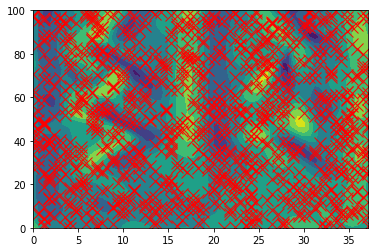

In [10]:
u_pred = model.predict_u(X_all[:,0:1],X_all[:,1:])

error_u_Data = np.linalg.norm(Uexact_all-u_pred,2)/np.linalg.norm(Uexact_all,2)
print('Error u: %e' % (error_u_Data))

U_pred_Data = griddata(X_all, u_pred.flatten(), (X, T), method='cubic')

plt.contourf(x,t,U_pred_Data)
plt.plot(X_trainData[:,0],X_trainData[:,1],'rx', markersize=12)

#### 2.4.2 Phys-Data case: Train the NN using the physical equation, IC and BC and all the datapoints
Modify to specify locations for the physical constraints (collocation, initial condition and boundary conditions)

In [ ]:
model.reset_weights()
# definition of the colocation points
# sampled for a latin-hypersampling method on the domain
N_coloc = 10000

# sample location for the IC
Nx_init = 50

# sample location for the periodic bc
Nt_BC = 50

start_time = time.time()

#model.train_phys(...) # provide the appropriate trace for the train_phys function

elapsed_PINN = time.time() - start_time                
print('Training time: %.4f' % (elapsed_PINN))

In [ ]:
u_pred = model.predict_u(X_all[:,0:1],X_all[:,1:])

error_u_PINN = np.linalg.norm(Uexact_all-u_pred,2)/np.linalg.norm(Uexact_all,2)
print('Error u: %e' % (error_u_PINN))
print('Error f: %e' % (error_f_PINN))

U_pred_PINN = griddata(X_all, u_pred.flatten(), (X, T), method='cubic')

plt.contourf(x,t,U_pred_PINN)


## 3 Comparison of the results and Discussion

In [ ]:
print('For Data-case, error on u at all datapoints is: %e' % (error_u_Data))
print('For PIBC-case, error on u at all datapoints is: %e' % (error_u_PINN))

print('For Data-case, error on residual datapoints is: %e' % (error_f_Data))
print('For PIBC-case, error on residual datapoints is: %e' % (error_f_PINN))

In [ ]:
plt.figure()
plt.subplot(1,2,1)
plt.contourf(x,t,U_pred_Data)
plt.subplot(1,2,2)
plt.contourf(x,t,np.abs(U_pred_Data-Exact))
plt.colorbar()

plt.figure()
plt.subplot(1,2,1)
plt.contourf(x,t,U_pred_PINN)
plt.subplot(1,2,2)
plt.contourf(x,t,np.abs(U_pred_PINN-Exact))
plt.colorbar()

plt.figure()
plt.contourf(x,t,Exact)
plt.colorbar()


In [ ]:
# Save some stuff
fln = 'KS_NN_results.h5'
hf = h5py.File(fln,'w')
hf.create_dataset('U_pred_data',data=U_pred_Data)
hf.create_dataset('U_pred_PINN',data=U_pred_PINN)
hf.create_dataset('U_Exact',data=Exact)
hf.create_dataset('x',data=x)
hf.create_dataset('t',data=t)
hf.close()
